# Phase 1 Code Challenge Review 

_September 23, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [4]:
# examine the first few elements of it
df.head()
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
# examine the dimensions of it
df.shape

(149, 6)

In [11]:
# check to see if you have missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# introduce some missing values
df.iloc[2,1:3] = np.nan
df.isnull().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [13]:
# drop them
df.dropna(inplace = True)

In [15]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10']= df['sepal_length'] *10
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0


In [24]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        49
Name: species, dtype: int64

#### 2. Data Visualization

In [25]:
# let's plot the average pedal length for each species of iris 

y = df.groupby(['species'])['petal_length'].mean()
x = y.index

Text(0.5, 0, 'species')

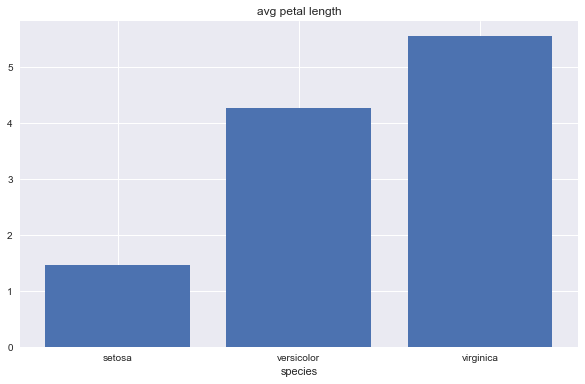

In [27]:
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('avg petal length')
ax.set_xlabel('species')

<BarContainer object of 4 artists>

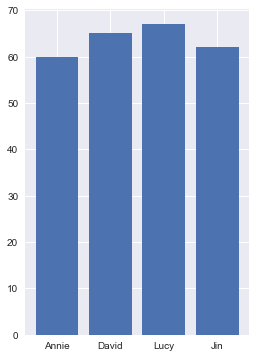

In [29]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]
ax.set_title('height by person')
fig, ax = plt.subplots(figsize = (4,6))
plt.bar(persons, height)

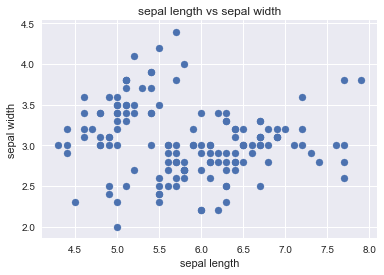

In [20]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.115303,0.870066,0.815701,1.000000
sepal_width,-0.115303,1.000000,-0.428329,-0.365487,-0.115303
petal_length,0.870066,-0.428329,1.000000,0.962424,0.870066
petal_width,0.815701,-0.365487,0.962424,1.000000,0.815701
sepal_length_10,1.000000,-0.115303,0.870066,0.815701,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [30]:
# calculate the mean and median value for sepal length 
print(df.sepal_length.mean())
print(df.sepal_length.median())
print(df.sepal_width.mean())
print(df.sepal_width.median())

5.851006711409395
5.8
3.0563758389261744
3.0


In [37]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?

df[['sepal_length', 'sepal_width']].agg('std')

sepal_length    0.825491
sepal_width     0.437178
dtype: float64

In [32]:
# which flower has the longest pedal? what is the species of that flower
df.groupby(['species']).sepal_length.max()

species
setosa        5.8
versicolor    7.0
virginica     7.9
Name: sepal_length, dtype: float64

#### 4. Python Data Structure 

In [38]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon',
        'teams': ['Alert','Independent','Playful']
    }],
    'Chuck Norris': [{
        'age': 8,
        'type': 'Parrot',
        'teams': ['Talkative','Independent','Cheery']
    }],
    'Joe Rogan': [{
        'age': 2,
        'type': 'Labrador',
        'teams': ['Hyper','Playful','Energetic']
    }]}]
}    

In [74]:
# loop through the dictionary, create a list of names containing all pets' names
names = []
for name in groomer_info['pets'][0].keys():
    names.append(name)
    
print (names)

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']


In [84]:
# loop through the collection, create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
names = []
for name in groomer_info['pets'][0].keys():
    names.append(name)
    
print (names)

list = []
for i in names:
    list.append(groomer_info['pets'][0][i][0]['type'])
print(list)

['Pitbull', 'Maine Coon', 'Parrot', 'Labrador']


In [82]:
groomer_info['pets'][0]['Ginger'][0]['type']

'Pitbull'

In [85]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(pets, age):
    pets = []
    for name in names:
        if groomer_info['pets'][0][name][0]['age'] > age:
            pets.append(name)
        else:
            continue
    return pets

In [86]:
pets_older_than(groomer_info, 4)

['Ginger', 'Chuck Norris']

TypeError: 'list' object is not callable

In [89]:
list = []
for i in list(range(n)):
    list.append[i]
    str(list)
    
print(sum(list))

[1, 1, 1, 2, 2, 3, 5, 7]